### Laboratorio 2

#### Problema #1:

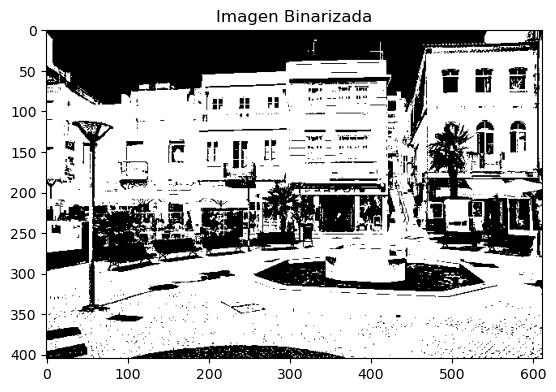

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def binarize_image(image_path, threshold=128):
    
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    _, binary_img = cv2.threshold(img, threshold, 255, cv2.THRESH_BINARY)
    
    plt.imshow(binary_img, cmap='gray')
    plt.title('Imagen Binarizada')
    plt.show()

binarize_image('Imagendom.jpg')

#### Problema #2:

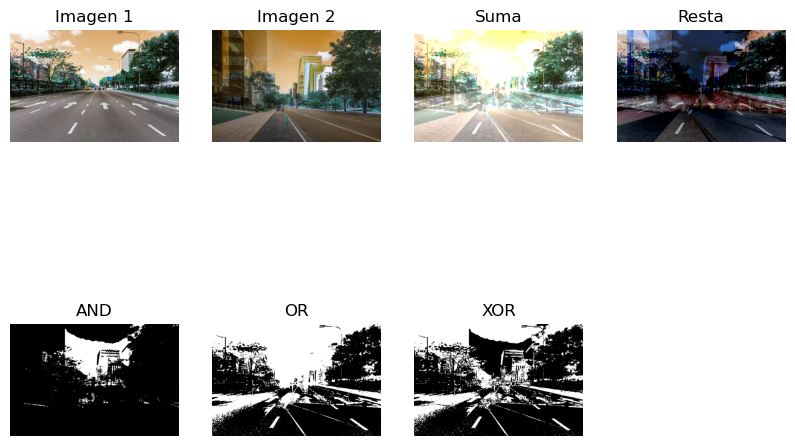

In [2]:
def process_images(img1_path, img2_path):

    img1 = cv2.imread(img1_path)
    img2 = cv2.imread(img2_path)
    
    if img1.shape != img2.shape:
        raise ValueError("Las imágenes deben tener el mismo tamaño")
    
    gray_img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    gray_img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
    
    _, binary_img1 = cv2.threshold(gray_img1, 128, 255, cv2.THRESH_BINARY)
    _, binary_img2 = cv2.threshold(gray_img2, 128, 255, cv2.THRESH_BINARY)
    
    sum_img = cv2.add(img1, img2)
    sub_img = cv2.subtract(img1, img2)
    and_img = cv2.bitwise_and(binary_img1, binary_img2)
    or_img = cv2.bitwise_or(binary_img1, binary_img2)
    xor_img = cv2.bitwise_xor(binary_img1, binary_img2)
    
    images = [img1, img2, sum_img, sub_img, and_img, or_img, xor_img]
    titles = ['Imagen 1', 'Imagen 2', 'Suma', 'Resta', 'AND', 'OR', 'XOR']
    
    plt.figure(figsize=(10, 7))
    for i in range(len(images)):
        plt.subplot(2, 4, i + 1)
        plt.imshow(images[i], cmap='gray' if i >= 4 else None)
        plt.title(titles[i])
        plt.axis('off')
    plt.show()

img1_path = 'Avenida1.jpg'
img2_path = 'Avenida2.jpg'

process_images(img1_path, img2_path)


#### Problema #3:

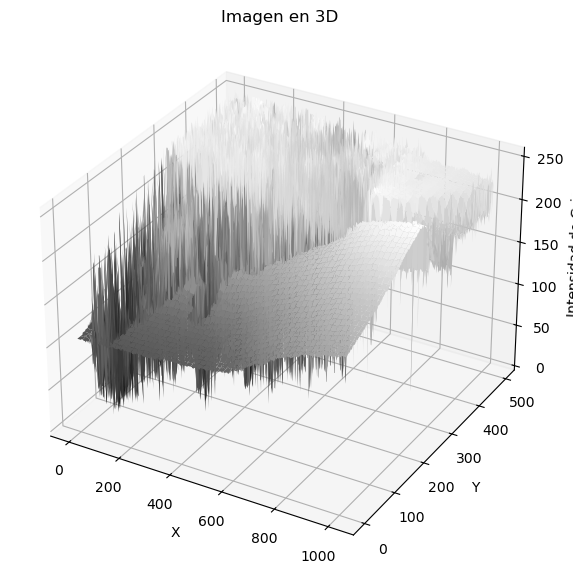

In [3]:
from mpl_toolkits.mplot3d import Axes3D

def plot_image_3d(img_path):

    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    
    rows, cols = img.shape
    
    X, Y = np.meshgrid(np.arange(cols), np.arange(rows))
    
    Z = img
    
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    
    ax.plot_surface(X, Y, Z, cmap='gray', edgecolor='none')
    
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Intensidad de Gris')
    ax.set_title('Imagen en 3D')
    
    plt.show()

img_path = 'Playaescaladegrises.jpg'

plot_image_3d(img_path)


### Problema #4:

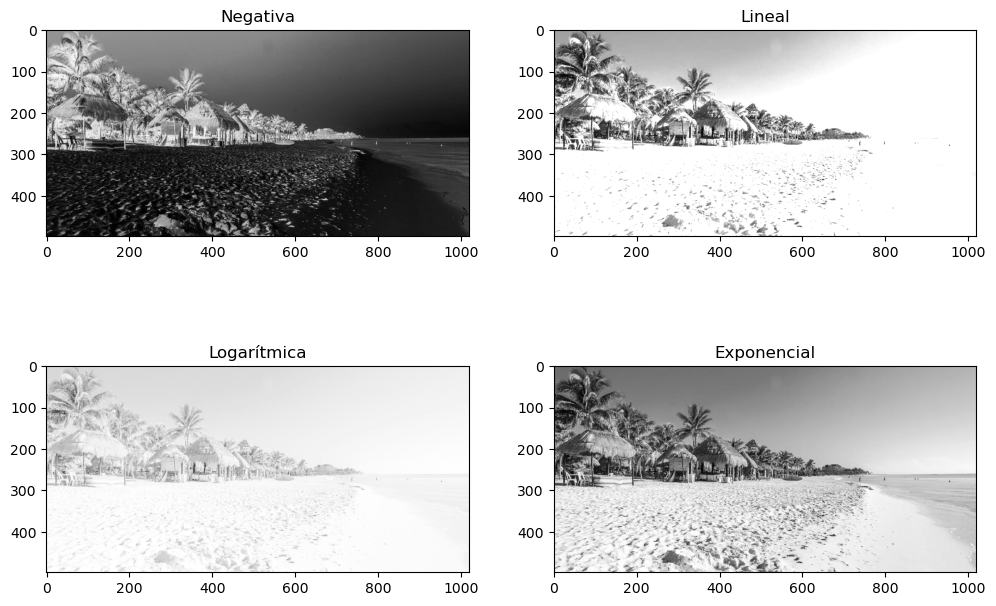

In [12]:
def negative_transform(image):
    return 255 - image

def linear_transform(image, alpha=1.5, beta=0):
    return cv2.convertScaleAbs(image, alpha=alpha, beta=beta)

def logarithmic_transform(image, c=1):
    image = np.array(image, dtype=np.float32)
    return c * np.log(1 + image)

def exponential_transform(image, gamma=1):
    return np.array(255 * (image / 255) ** gamma, dtype='uint8')

def apply_transformations(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    neg_img = negative_transform(img)
    lin_img = linear_transform(img)
    log_img = logarithmic_transform(img)
    exp_img = exponential_transform(img)
    
    plt.figure(figsize=(12, 8))
    
    plt.subplot(2, 2, 1)
    plt.imshow(neg_img, cmap='gray')
    plt.title('Negativa')

    plt.subplot(2, 2, 2)
    plt.imshow(lin_img, cmap='gray')
    plt.title('Lineal')

    plt.subplot(2, 2, 3)
    plt.imshow(log_img, cmap='gray')
    plt.title('Logarítmica')

    plt.subplot(2, 2, 4)
    plt.imshow(exp_img, cmap='gray')
    plt.title('Exponencial')

    plt.show()

apply_transformations('Playa.jpg')


#### Problema #5:

##### El kernel Laplaciano es una herramienta usada en procesamiento de imágenes para detectar bordes, basada en el cálculo de la segunda derivada de la intensidad de la imagen. Su característica principal es ser isotrópico, es decir, puede identificar cambios bruscos en la intensidad en cualquier dirección sin favorecer una orientación particular. Al aplicar este operador, se destacan los bordes en las áreas donde la intensidad varía rápidamente, marcando los puntos donde la segunda derivada cambia de signo. Un inconveniente del Laplaciano es su alta sensibilidad al ruido, lo que puede llevar a identificar como bordes variaciones que en realidad son causadas por ruido.

##### El algoritmo de Canny ofrece una detección de bordes más refinada y robusta. Este método sigue varios pasos para asegurar una mejor calidad en la detección. Primero, suaviza la imagen para reducir el impacto del ruido. Luego, calcula el gradiente para identificar la magnitud y dirección de los bordes. Luego, realiza una supresión de no máximos, que ayuda a conservar solo los bordes más significativos. Por último, aplica un doble umbral con histéresis para diferenciar entre bordes fuertes y débiles, manteniendo solo los contornos más claros y definidos. A diferencia del Laplaciano, el algoritmo de Canny toma en cuenta la orientación de los bordes y es menos propenso a errores causados por el ruido, ofreciendo una detección más precisa y confiable.
